In [1]:
import pandas as pd

# Read data from Excel file with header starting from the second row
df = pd.read_excel('C:/Users/PAS000018/Desktop/AI/Dummy Customer Compliant Data_1.xlsx', header=1)

# Assuming your date column is named 'source creation date'
# Convert the 'source creation date' column to datetime format
df['source creation date'] = pd.to_datetime(df['SOURCE CREATION DATE'], format='%d/%m/%Y')

# Extract year, month, and day into separate columns
df['year'] = df['source creation date'].dt.year
df['month'] = df['source creation date'].dt.month
df['day'] = df['source creation date'].dt.day

# Print the DataFrame with separated columns
print(df)



FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/PAS000018/Desktop/AI/Dummy Customer Compliant Data_1.xlsx'

In [ ]:
print(df.columns)

In [ ]:
# Assuming your DataFrame is named 'df'
# Fill NaN values in 'year', 'month', and 'day' columns with zeros
df['year'] = df['year'].fillna(0).astype(int)
df['month'] = df['month'].fillna(0).astype(int)
df['day'] = df['day'].fillna(0).astype(int)

# Print the DataFrame to verify changes
print(df)


In [ ]:
import pandas as pd

# Create a DataFrame with all months (1 to 12)
df = pd.DataFrame({'month': range(1, 13)})

# Define a function to map numerical month values to seasons
def map_season(month):
    if month in range(2, 7):
        return 'Summer'
    elif month in [10, 11, 12, 1]:
        return 'Monsoon'
    else:
        return 'Wind'

# Apply the function to create a new 'season' column
df['season'] = df['month'].apply(map_season)

# Print the DataFrame with 'season' column
print(df)


In [ ]:

print(df.columns)


In [ ]:
import pandas as pd

# Read data from Excel file with header starting from the second row
df = pd.read_excel('Dummy Customer Compliant Data.xlsx', header=1)
df['PIMOF'] = df['PIMOF'].replace({'yes': 1, 'no': 0})
# Assuming your date column is named 'source creation date'
# Convert the 'source creation date' column to datetime format
df['source creation date'] = pd.to_datetime(df['SOURCE CREATION DATE'], format='%d/%m/%Y')

# Extract year, month, and day into separate columns
df['year'] = df['source creation date'].dt.year
df['month'] = df['source creation date'].dt.month
df['day'] = df['source creation date'].dt.day

# # Concatenate the new columns with the original DataFrame
# df = pd.concat([df[['day', 'month', 'year']], df], axis=1)

# Print the DataFrame with separated columns
print(df.columns)

In [ ]:
# import pandas as pd
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler

# # Assuming you have already loaded the DataFrame and added the 'year', 'month', 'day', and 'season' columns
# from sklearn.preprocessing import LabelEncoder

# # Initialize LabelEncoder
# label_encoder = LabelEncoder()

# # Encode categorical variables to numeric values
# df['PIMOF'] = label_encoder.fit_transform(df['PIMOF'])

# # Scaling the data
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(df)





# # Selecting columns for clustering
# X = df[['INCIDENT N°', 'PIMOF', 'MIS', 'MILEAGE (KM)', 'day', 'month', 'year']]

# # Ensure 'day', 'month', and 'year' columns are numeric
# X['day'] = pd.to_numeric(X['day'], errors='coerce')
# X['month'] = pd.to_numeric(X['month'], errors='coerce')
# X['year'] = pd.to_numeric(X['year'], errors='coerce')

# # Handling missing values
# X.fillna(0, inplace=True)  # Replace missing values with 0 or any other appropriate value

# # Scaling the data
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)


# # Selecting columns for clustering
# X = df[['INCIDENT N°', 'PIMOF', 'MIS', 'MILEAGE (KM)', 'SOURCE CREATION DATE']]

# # Handling missing values
# X.fillna(0, inplace=True)  # Fill missing values with 0, assuming missing values indicate absence of information

# # Scaling the data
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Initialize KMeans clustering with a chosen number of clusters
# kmeans = KMeans(n_clusters=3)

# # Fit KMeans clustering to the scaled data
# kmeans.fit(X_scaled)

# # Assign cluster labels to the original DataFrame
# df['cluster_label'] = kmeans.labels_

# # Print the DataFrame with cluster labels
# print(df)

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Assuming you have already loaded the DataFrame and added the 'year', 'month', 'day', and 'season' columns
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical variables to numeric values
df['PIMOF'] = label_encoder.fit_transform(df['PIMOF'])
df['PIMOF'].fillna(df['PIMOF'].median(), inplace=True)
# Selecting columns for clustering
X = df[['INCIDENT N°', 'PIMOF', 'MIS', 'MILEAGE (KM)', 'day', 'month', 'year']]
# # Ensure 'day', 'month', and 'year' columns are numeric
df['year'].interpolate(method='linear', inplace=True)
df['month'].interpolate(method='linear', inplace=True)
df['day'].interpolate(method='linear', inplace=True)

# # Handling missing values
X.fillna(0, inplace=True)  # Replace missing values with 0 or any other appropriate value
X['day'] = X['day'].astype(int)
X['month'] = X['month'].astype(int)
X['year'] = X['year'].astype(int)
# Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize KMeans clustering with a chosen number of clusters
kmeans = KMeans(n_clusters=2)

# Fit KMeans clustering to the scaled data
kmeans.fit(X_scaled)

# Assign cluster labels to the original DataFrame
X['cluster_label'] = kmeans.labels_

# Print the DataFrame with cluster labels
X.head()

In [ ]:
X['month'].value_counts()

In [ ]:
X['cluster_label'].value_counts()

In [ ]:
# Assuming you have already performed clustering and added cluster labels to your DataFrame (df)
# and you've interpreted the clusters to identify sensitive and non-sensitive groups

# Assuming Cluster 0 represents sensitive customers and Cluster 1 represents non-sensitive customers
sensitive_cluster_label = 1

# Create a new column to store sensitivity labels
X['Sensitivity'] = 'Non-sensitive'  # Default label

# Update sensitivity labels based on cluster membership
X.loc[X['cluster_label'] == sensitive_cluster_label, 'Sensitivity'] = 'Sensitive'

# Display the first few rows to verify sensitivity labels
print(X.tail())

In [ ]:
X['Sensitivity'].value_counts()

In [ ]:
import pandas as pd
# SYMPTOM CODE = B261  - Noise/vibrations every time the load is changed forward gear - reverse gear and

# Define the new data dictionary
new_data =pd.DataFrame({
    'INCIDENT N°':[212472461] ,
    'PIMOF':[0] ,
    'MIS' : [13],
    'MILEAGE (KM)' :[12594] ,
    'day' :[0] ,
    'month' : [0],
    'year' :[0] ,
    
})

new_data_scaled = scaler.transform(new_data)

# Predict the clusters of the new data
predicted_clusters = kmeans.predict(new_data_scaled)

# Add predicted cluster labels to the new data
new_data['Predicted Cluster'] = predicted_clusters
# Now, you can explore the new data with predicted cluster labels
print(new_data.head())
print('\n')
for cluster_label in predicted_clusters:
    if cluster_label == 0:
        print('Sensitive Customer')
    else:
        print('Non-sensitive Customer')

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have the original dataset with attributes and predicted clusters
# original_data = ...

# Separate incidents into sensitive and non-sensitive based on predicted clusters
sensitive_incidents = X[X['cluster_label'] == 0]
non_sensitive_incidents = X[X['cluster_label'] != 0]

# Analyze attribute distribution for sensitive incidents
sensitive_attributes = sensitive_incidents.mean()  # You can use any aggregation function
print("Sensitive Attributes:")
print(sensitive_attributes)

# Analyze attribute distribution for non-sensitive incidents
non_sensitive_attributes = non_sensitive_incidents.mean()  # You can use any aggregation function
print("\nNon-sensitive Attributes:")
print(non_sensitive_attributes)

# Plot incidents with the most sensitive or non-sensitive attributes
plt.figure(figsize=(10, 6))

# You can choose any attribute to plot, here we are assuming 'MILEAGE (KM)'
plt.scatter(sensitive_incidents['INCIDENT N°'], sensitive_incidents['MILEAGE (KM)'], color='red', label='Sensitive')
plt.scatter(non_sensitive_incidents['INCIDENT N°'], non_sensitive_incidents['MILEAGE (KM)'], color='blue', label='Non-sensitive')

plt.title('Incidents Sensitivity')
plt.xlabel('Incident Number')
plt.ylabel('MILEAGE (KM)')
plt.legend()
plt.show()

In [ ]:
print(X.dtypes)

# Ensure there are no missing values in the columns used for plotting
# You can use the following code to check for missing values:
print(X.isnull().sum())

# Check the data in the columns used for plotting to ensure it is correctly formatted
# You can use the following code to inspect the data:
print(X.head())

In [ ]:
import matplotlib.pyplot as plt

# Separate incidents into sensitive and non-sensitive based on sensitivity
sensitive_incidents = X[X['cluster_label'] == 0]
non_sensitive_incidents = X[X['cluster_label'] != 0]

# Create box plots for all attributes
plt.figure(figsize=(12, 8))

# Iterate through each column except 'INCIDENT N°', 'cluster_label', and 'Sensitivity'
for column in X.columns.difference(['INCIDENT N°', 'cluster_label', 'Sensitivity']):
    plt.subplot(2, 4, X.columns.get_loc(column) + 1)
    plt.boxplot([sensitive_incidents[column], non_sensitive_incidents[column]], labels=['Sensitive', 'Non-sensitive'])
    plt.title(column)

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Group the data by INCIDENT N° and calculate the average values for sensitive and non-sensitive incidents
average_values = X.groupby('INCIDENT N°').agg({
    'MIS': 'mean',
    'MILEAGE (KM)': 'mean',
    'Sensitivity': 'first'  # Assuming Sensitivity column indicates sensitivity
}).reset_index()

# Create bar plots to compare average values between sensitive and non-sensitive incidents
plt.figure(figsize=(10, 6))

# Bar plot for 'MIS'
plt.subplot(1, 2, 1)
plt.bar(['Sensitive', 'Non-sensitive'], average_values.groupby('Sensitivity')['MIS'].mean())
plt.title('Average MIS by Sensitivity')
plt.xlabel('Sensitivity')
plt.ylabel('Average MIS')

# Bar plot for 'MILEAGE (KM)'
plt.subplot(1, 2, 2)
plt.bar(['Sensitive', 'Non-sensitive'], average_values.groupby('Sensitivity')['MILEAGE (KM)'].mean())
plt.title('Average MILEAGE (KM) by Sensitivity')
plt.xlabel('Sensitivity')
plt.ylabel('Average MILEAGE (KM)')

plt.tight_layout()
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Examples of INCIDENT N°
desired_incidents = [212467991, 212472456, 212472461,128407887,128405012,128458648,128458565]

# Filter the data based on the desired INCIDENT N°s
filtered_data = average_values[average_values['INCIDENT N°'].isin(desired_incidents)]

# Create the bar plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=filtered_data, x='INCIDENT N°', y='MIS', hue='Sensitivity', palette='viridis')
plt.xlabel('INCIDENT N°')
plt.ylabel('Average MIS')
plt.title('Average MIS for Selected INCIDENT N°s')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Sensitivity')

plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Examples of INCIDENT N°
desired_incidents = X['INCIDENT N°'].iloc[1:50]

# Filter the data based on the desired INCIDENT N°s
filtered_data = average_values[average_values['INCIDENT N°'].isin(desired_incidents)].copy()

# Map Sensitivity to 'Sensitive' and 'Non-sensitive' using .loc
filtered_data.loc[:, 'Sensitivity Category'] = filtered_data['Sensitivity'].map({'Sensitive': 'Sensitive', 'Non-sensitive': 'Non-sensitive'})

# Create the bar plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=filtered_data, x='INCIDENT N°', y='MIS', hue='Sensitivity Category', palette='viridis')
plt.xlabel('INCIDENT N°')
plt.ylabel('Average MIS')
plt.title('Average MIS for Selected INCIDENT N°s')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Sensitivity Category')

plt.tight_layout()
plt.show()


In [ ]:
X.columns

In [ ]:
# Check for column name and data availability
print(X.info())

# Check unique values in the 'PIMOF' column
print(X['PIMOF'].unique())

# Check data types of columns
print(X.dtypes)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot for 'year' attribute
plt.figure(figsize=(10, 6))
sns.countplot(data=X, x='year', hue='Sensitivity', palette='viridis')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Distribution of Incidents Over Years')
plt.xticks(rotation=45)
plt.legend(title='Sensitivity Category')
plt.show()


In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Examples of INCIDENT N°
# desired_incidents = X['INCIDENT N°'][1:50]

# # Filter the data based on the desired INCIDENT N°s
# filtered_data = average_values[average_values['INCIDENT N°'].isin(desired_incidents)].copy()

# # Melt the dataframe to reshape it for visualization
# melted_data = pd.melt(filtered_data, id_vars=['INCIDENT N°', 'Sensitivity'], var_name='Attribute', value_name='Value')

# # Create subplots
# plt.figure(figsize=(16, 8))

# # Plot for 'MIS' attribute
# plt.subplot(1, 2, 1)
# sns.barplot(data=filtered_data, x='INCIDENT N°', y='MIS', hue='Sensitivity', palette='viridis')
# plt.xlabel('INCIDENT N°')
# plt.ylabel('Average MIS')
# plt.title('Average MIS for Selected INCIDENT N°s')
# plt.xticks(rotation=45)
# plt.legend(title='Sensitivity Category')

# plt.figure(figsize=(16, 8))
# # Plot for 'MIS' attribute
# plt.subplot(1, 2, 1)
# sns.barplot(data=filtered_data, x='INCIDENT N°', y='MILEAGE (KM)', hue='Sensitivity', palette='viridis')
# plt.xlabel('INCIDENT N°')
# plt.ylabel('Average MILEAGE (KM)')
# plt.title('Average MILEAGE (KM) for Selected INCIDENT N°s')
# plt.xticks(rotation=45)
# plt.legend(title='Sensitivity Category')


# plt.tight_layout()
# plt.show()
import seaborn as sns
import matplotlib.pyplot as plt

# Examples of INCIDENT N°
desired_incidents = X['INCIDENT N°'][1:50]

# Filter the data based on the desired INCIDENT N°s
filtered_data = average_values[average_values['INCIDENT N°'].isin(desired_incidents)].copy()

# Create a figure with subplots
plt.figure(figsize=(22, 8))

# Plot for 'MIS' attribute
plt.subplot(1, 2, 1)
sns.barplot(data=filtered_data, x='INCIDENT N°', y='MIS', hue='Sensitivity', palette='viridis')
plt.xlabel('INCIDENT N°')
plt.ylabel('Average MIS')
plt.title('Average MIS for Selected INCIDENT N°s')
plt.xticks(rotation=45)
plt.legend(title='Sensitivity Category')

# Plot for 'MILEAGE (KM)' attribute
plt.subplot(1, 2, 2)
sns.barplot(data=filtered_data, x='INCIDENT N°', y='MILEAGE (KM)', hue='Sensitivity', palette='viridis')
plt.xlabel('INCIDENT N°')
plt.ylabel('Average MILEAGE (KM)')
plt.title('Average MILEAGE (KM) for Selected INCIDENT N°s')
plt.xticks(rotation=45)
plt.legend(title='Sensitivity Category')

plt.figure(figsize=(10, 6))
sns.countplot(data=X, x='year', hue='Sensitivity', palette='viridis')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Distribution of Incidents Over Years')
plt.xticks(rotation=45)
plt.legend(title='Sensitivity Category')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=X, x='month', hue='Sensitivity', palette='viridis')
plt.xlabel('month')
plt.ylabel('Count')
plt.title('Distribution of Incidents Over month')
plt.xticks(rotation=45)
plt.legend(title='Sensitivity Category')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=X, x='PIMOF', hue='Sensitivity', palette='viridis')
plt.xlabel('PIMOF')
plt.ylabel('Count')
plt.title('Distribution of Incidents Over PIMOF')
plt.xticks(rotation=45)
plt.legend(title='Sensitivity Category')
plt.show()
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Group the data by INCIDENT N° and calculate the average values for sensitive and non-sensitive incidents
average_values = X.groupby(['INCIDENT N°', 'Sensitivity']).agg({
    'MIS': 'mean',
    'MILEAGE (KM)': 'mean'
}).reset_index()

# Create bar plots to compare average values between sensitive and non-sensitive incidents
plt.figure(figsize=(12, 6))

# Bar plot for 'MIS'
plt.subplot(1, 2, 1)
for sensitivity, color in zip(['Sensitive', 'Non-sensitive'], ['blue', 'orange']):
    data = average_values[average_values['Sensitivity'] == sensitivity]
    plt.bar(data['INCIDENT N°'], data['MIS'], color=color, label=sensitivity)
plt.title('Average MIS by Incident')
plt.xlabel('INCIDENT N°')
plt.ylabel('Average MIS')
plt.legend()

# Bar plot for 'MILEAGE (KM)'
plt.subplot(1, 2, 2)
for sensitivity, color in zip(['Sensitive', 'Non-sensitive'], ['blue', 'orange']):
    data = average_values[average_values['Sensitivity'] == sensitivity]
    plt.bar(data['INCIDENT N°'], data['MILEAGE (KM)'], color=color, label=sensitivity)
plt.title('Average MILEAGE (KM) by Incident')
plt.xlabel('INCIDENT N°')
plt.ylabel('Average MILEAGE (KM)')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Group the data by INCIDENT N° and calculate the average values for sensitive and non-sensitive incidents
average_values = X.groupby(['INCIDENT N°', 'Sensitivity']).agg({
    'MIS': 'mean',
    'MILEAGE (KM)': 'mean'
}).reset_index()

# Create bar plots to compare average values between sensitive and non-sensitive incidents
plt.figure(figsize=(12, 6))

# Bar plot for 'MIS'
plt.subplot(1, 2, 1)
sensitive_data = average_values[average_values['Sensitivity'] == 'Sensitive']
non_sensitive_data = average_values[average_values['Sensitivity'] == 'Non-sensitive']
plt.bar(sensitive_data['INCIDENT N°'], sensitive_data['MIS'], color='blue', label='Sensitive', alpha=0.6)
plt.bar(non_sensitive_data['INCIDENT N°'], non_sensitive_data['MIS'], color='orange', label='Non-sensitive', alpha=0.6)
plt.title('Average MIS by Incident')
plt.xlabel('INCIDENT N°')
plt.ylabel('Average MIS')
plt.legend()

# Bar plot for 'MILEAGE (KM)'
plt.subplot(1, 2, 2)
plt.bar(sensitive_data['INCIDENT N°'], sensitive_data['MILEAGE (KM)'], color='blue', label='Sensitive', alpha=0.6)
plt.bar(non_sensitive_data['INCIDENT N°'], non_sensitive_data['MILEAGE (KM)'], color='orange', label='Non-sensitive', alpha=0.6)
plt.title('Average MILEAGE (KM) by Incident')
plt.xlabel('INCIDENT N°')
plt.ylabel('Average MILEAGE (KM)')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Read Excel data
df = pd.read_excel('Dummy Customer Compliant Data.xlsx', header=1)
desired_incidents = [212467991, 212472456, 212472461,128407887,128405012,128458648,128458565]
# Assuming you have already filtered the data and stored it in filtered_data
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode 'PIMOF' column into numerical values
df['PIMOF'] = label_encoder.fit_transform(df['PIMOF'])

# Selecting columns for clustering
X = df[['PIMOF', 'MIS', 'MILEAGE (KM)']]

# Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize KMeans clustering with a chosen number of clusters
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit KMeans clustering to the scaled data
kmeans.fit(X_scaled)

# Assign cluster labels to the original DataFrame
df['Sensitivity'] = kmeans.labels_

# Melt the DataFrame to combine 'PIMOF', 'MIS', and 'MILEAGE (KM)' into a single column
melted_df = df.melt(id_vars=['INCIDENT N°', 'Sensitivity'], value_vars=['PIMOF', 'MIS', 'MILEAGE (KM)'], 
                    var_name='Attribute', value_name='Value')

# Filtered Data
filtered_data = melted_df[melted_df['INCIDENT N°'].isin(desired_incidents)]
filtered_data['Sensitivity Category'] = filtered_data['Sensitivity'].map({0: 'Non-sensitive', 1: 'Sensitive'})

# Plotting with swarm plot
plt.figure(figsize=(12, 6))
sns.swarmplot(data=filtered_data, x='INCIDENT N°', y='Value', hue='Sensitivity Category', palette='viridis')
plt.xlabel('INCIDENT N°')
plt.ylabel('Value')
plt.title('PIMOF, MIS, and MILEAGE (KM) by Incident with Sensitivity Category')
plt.xticks(rotation=45)
plt.legend(title='Sensitivity Category', loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Read Excel data
df = pd.read_excel('Dummy Customer Compliant Data.xlsx', header=1)
desired_incidents = [212467991, 212472456, 212472461, 128407887, 128405012, 128458648, 128458565]

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode 'PIMOF' column into numerical values
df['PIMOF'] = label_encoder.fit_transform(df['PIMOF'])

# Selecting columns for clustering
X = df[['PIMOF', 'MIS', 'MILEAGE (KM)']]

# Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize KMeans clustering with a chosen number of clusters
kmeans = KMeans(n_clusters=4, random_state=42)

# Fit KMeans clustering to the scaled data
kmeans.fit(X_scaled)

# Assign cluster labels to the original DataFrame
df['Sensitivity'] = kmeans.labels_

# Melt the DataFrame to combine 'PIMOF', 'MIS', and 'MILEAGE (KM)' into a single column
melted_df = df.melt(id_vars=['INCIDENT N°', 'Sensitivity'], value_vars=['PIMOF', 'MIS', 'MILEAGE (KM)'], 
                    var_name='Attribute', value_name='Value')
filtered_data = melted_df[melted_df['INCIDENT N°'].isin(desired_incidents)]
filtered_data['Sensitivity Category'] = filtered_data['Sensitivity'].map({0: 'Non-sensitive', 1: 'Sensitive',
                                                                         2: 'Highly Sensitive', 3: 'Extremely Sensitive'})

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_data, x='INCIDENT N°', y='Value', hue='Sensitivity Category', style='Attribute', markers=True)
plt.xlabel('INCIDENT N°')
plt.ylabel('Value')
plt.title('PIMOF, MIS, and MILEAGE (KM) by Incident with Sensitivity Category')
plt.xticks(rotation=45)
plt.legend(title='Sensitivity Category')
plt.tight_layout()
plt.show()




In [ ]:
import pandas as pd
# SYMPTOM CODE = B261  - Noise/vibrations every time the load is changed forward gear - reverse gear and

# Define the new data dictionary
new_data =pd.

new_data_scaled = scaler.transform(new_data)

# Predict the clusters of the new data
predicted_clusters = kmeans.predict(new_data_scaled)

# Add predicted cluster labels to the new data
new_data['Predicted Cluster'] = predicted_clusters
# Now, you can explore the new data with predicted cluster labels
print(new_data.head())
print('\n')
for cluster_label in predicted_clusters:
    if cluster_label == 0:
        print('Sensitive Customer')
    else:
        print('Non-sensitive Customer')

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with all months (1 to 12)
df = pd.DataFrame({'month': range(1, 13)})

# Define a function to map numerical month values to seasons
def map_season(month):
    if month in range(2, 7):
        return 'Summer'
    elif month in [10, 11, 12, 1]:
        return 'Monsoon'
    else:
        return 'Wind'

# Apply the function to create a new 'season' column
df['season'] = df['month'].apply(map_season)

# Create a 'sensitive_category' column with random values
np.random.seed(42)  # For reproducibility
df['sensitive_category'] = np.random.choice(['Sensitive', 'Non-sensitive'], size=len(df))

# Plot the graph using seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='season', hue='sensitive_category', data=df)
plt.title('Count of Sensitive and Non-sensitive Customers by Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with columns 'PIMOF' and 'INCIDENT N°'
df = pd.read_excel('Dummy Customer Compliant Data.xlsx', header=1)
# Generate a random 'sensitive_category' column
df['sensitive_category'] = np.random.choice(['Sensitive', 'Non-sensitive'], size=len(df))

# Calculate the average incidents for each PIMOF value separately for sensitive and non-sensitive categories
avg_incidents = df.groupby(['PIMOF', 'sensitive_category'])['INCIDENT N°'].mean().reset_index()

# Plot the data using seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Plot the average incidents vs. PIMOF with hue as the sensitivity category
sns.barplot(x='PIMOF', y='INCIDENT N°', hue='sensitive_category', data=avg_incidents)
plt.title('Average Incidents vs. PIMOF with Randomly Assigned Sensitivity Category')
plt.xlabel('PIMOF')
plt.ylabel('Average Incidents')

plt.show()


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with columns 'MIS', 'MILEAGE (KM)', and 'INCIDENT N°'
df = pd.read_excel('Dummy Customer Compliant Data.xlsx', header=1)

# Generate a random 'sensitive_category' column
df['sensitive_category'] = np.random.choice(['Sensitive', 'Non-sensitive'], size=len(df))

# Calculate the average incidents for each MIS value separately for sensitive and non-sensitive categories
avg_incidents_mis = df.groupby(['MIS', 'sensitive_category'])['INCIDENT N°'].mean().reset_index()

# Plot the data for MIS using seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Plot the average incidents vs. MIS with hue as the sensitivity category
sns.barplot(x='MIS', y='INCIDENT N°', hue='sensitive_category', data=avg_incidents_mis)
plt.title('Average Incidents vs. MIS with Randomly Assigned Sensitivity Category')
plt.xlabel('MIS')
plt.ylabel('Average Incidents')

plt.show()

# Calculate the average incidents for each Mileage (KM) value separately for sensitive and non-sensitive categories
avg_incidents_mileage = df.groupby(['MILEAGE (KM)', 'sensitive_category'])['INCIDENT N°'].mean().reset_index()

# Plot the data for Mileage (KM) using seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Plot the average incidents vs. Mileage (KM) with hue as the sensitivity category
sns.barplot(x='MILEAGE (KM)', y='INCIDENT N°', hue='sensitive_category', data=avg_incidents_mileage)
plt.title('Average Incidents vs. Mileage (KM) with Randomly Assigned Sensitivity Category')
plt.xlabel('Mileage (KM)')
plt.ylabel('Average Incidents')

plt.show()


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with columns 'MIS', 'MILEAGE (KM)', and 'INCIDENT N°'
df = pd.read_excel('Dummy Customer Compliant Data.xlsx', header=1)

# Generate a random 'sensitive_category' column
df['sensitive_category'] = np.random.choice(['Sensitive', 'Non-sensitive'], size=len(df))

# Calculate the average incidents for each MIS value separately for sensitive and non-sensitive categories
avg_incidents_mis = df[df['sensitive_category'] == 'Sensitive'].groupby(['MIS'])['INCIDENT N°'].mean().reset_index()

# Plot the data for MIS using seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Plot the average incidents vs. MIS for the sensitive category
sns.barplot(x='MIS', y='INCIDENT N°', data=avg_incidents_mis)
plt.title('Average Incidents vs. MIS for Sensitive Category')
plt.xlabel('MIS')
plt.ylabel('Average Incidents')

plt.show()

# Calculate the average incidents for each Mileage (KM) value separately for sensitive and non-sensitive categories
avg_incidents_mileage = df[df['sensitive_category'] == 'Sensitive'].groupby(['MILEAGE (KM)'])['INCIDENT N°'].mean().reset_index()

# Plot the data for Mileage (KM) using seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Plot the average incidents vs. Mileage (KM) for the sensitive category
sns.barplot(x='MILEAGE (KM)', y='INCIDENT N°', data=avg_incidents_mileage)
plt.title('Average Incidents vs. Mileage (KM) for Sensitive Category')
plt.xlabel('Mileage (KM)')
plt.ylabel('Average Incidents')

plt.show()


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with columns 'MIS', 'MILEAGE (KM)', and 'INCIDENT N°'
df = pd.read_excel('Dummy Customer Compliant Data.xlsx', header=1)

# Generate a random 'sensitive_category' column
df['sensitive_category'] = np.random.choice(['Sensitive', 'Non-sensitive'], size=len(df))

# Calculate the average incidents for each MIS value separately for sensitive and non-sensitive categories
avg_incidents_mis = df[df['sensitive_category'] == 'Sensitive'].groupby(['MIS'])['INCIDENT N°'].mean().reset_index()

# Plot the data for MIS using seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Plot the average incidents vs. MIS for the sensitive category
sns.barplot(x='INCIDENT N°', y='MIS', data=avg_incidents_mis)
plt.title('Average Incidents vs. MIS for Sensitive Category')
plt.xlabel('Average Incidents')
plt.ylabel('MIS')

plt.show()

# Calculate the average incidents for each Mileage (KM) value separately for sensitive and non-sensitive categories
avg_incidents_mileage = df[df['sensitive_category'] == 'Sensitive'].groupby(['MILEAGE (KM)'])['INCIDENT N°'].mean().reset_index()

# Plot the data for Mileage (KM) using seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Plot the average incidents vs. Mileage (KM) for the sensitive category
sns.barplot(x='INCIDENT N°', y='MILEAGE (KM)', data=avg_incidents_mileage)
plt.title('Average Incidents vs. Mileage (KM) for Sensitive Category')
plt.xlabel('Average Incidents')
plt.ylabel('Mileage (KM)')

plt.show()


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with columns 'MIS' and 'INCIDENT N°'
df = pd.read_excel('Dummy Customer Compliant Data.xlsx', header=1)

# Generate a random 'sensitive_category' column
df['sensitive_category'] = np.random.choice(['Sensitive', 'Non-sensitive'], size=len(df))

# Filter data for sensitive category
df_sensitive = df[df['sensitive_category'] == 'Sensitive']

# Calculate the average incidents for each MIS value
avg_incidents_mis = df_sensitive.groupby(['MIS'])['INCIDENT N°'].mean().reset_index()

# Plot the data using seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plot the average incidents vs. MIS for the sensitive category
sns.barplot(x='INCIDENT N°', y='MIS', data=avg_incidents_mis)
plt.title('Average Incidents vs. MIS for Sensitive Category')
plt.xlabel('Average Incidents')
plt.ylabel('MIS')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


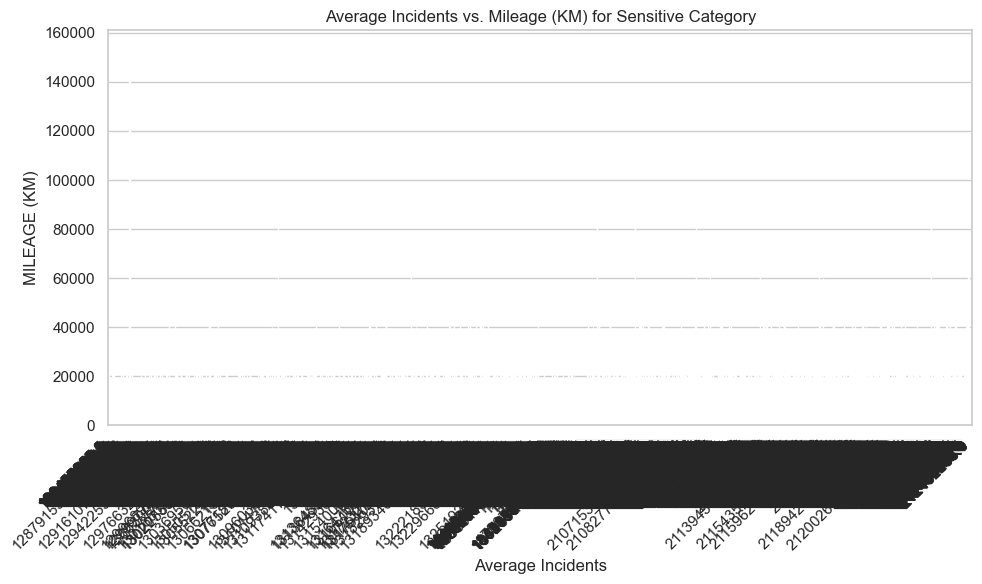

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with columns 'MILEAGE (KM)' and 'INCIDENT N°'
df = pd.read_excel('Dummy Customer Compliant Data.xlsx', header=1)

# Generate a random 'sensitive_category' column
df['sensitive_category'] = np.random.choice(['Sensitive', 'Non-sensitive'], size=len(df))

# Filter data for sensitive category
df_sensitive = df[df['sensitive_category'] == 'Sensitive']

# Calculate the average incidents for each Mileage (KM) value
avg_incidents_mileage = df_sensitive.groupby(['MILEAGE (KM)'])['INCIDENT N°'].mean().reset_index()

# Plot the data using seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plot the average incidents vs. Mileage (KM) for the sensitive category
sns.barplot(x='INCIDENT N°', y='MILEAGE (KM)', data=avg_incidents_mileage)
plt.title('Average Incidents vs. Mileage (KM) for Sensitive Category')
plt.xlabel('Average Incidents')
plt.ylabel('MILEAGE (KM)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


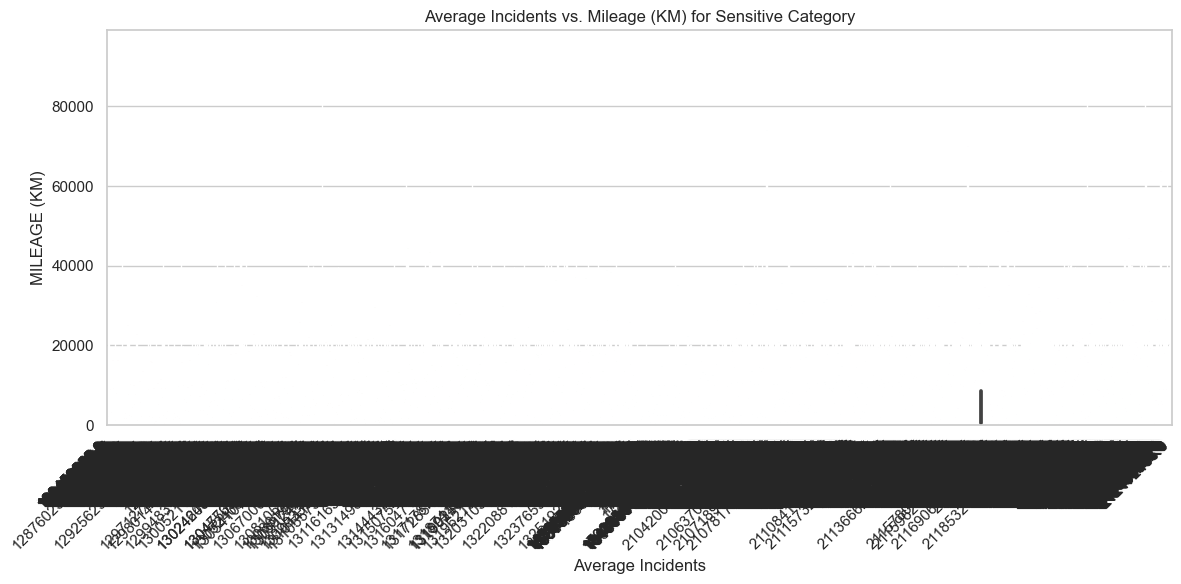

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with columns 'MILEAGE (KM)' and 'INCIDENT N°'
df = pd.read_excel('Dummy Customer Compliant Data.xlsx', header=1)

# Generate a random 'sensitive_category' column
df['sensitive_category'] = np.random.choice(['Sensitive', 'Non-sensitive'], size=len(df))

# Filter data for the sensitive category
df_sensitive = df[df['sensitive_category'] == 'Sensitive']

# Calculate the average incidents for each Mileage (KM) value
avg_incidents_mileage = df_sensitive.groupby(['MILEAGE (KM)'])['INCIDENT N°'].mean().reset_index()

# Plot the data using seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Plot the average incidents vs. Mileage (KM) for the sensitive category
sns.barplot(x='INCIDENT N°', y='MILEAGE (KM)', data=avg_incidents_mileage)
plt.title('Average Incidents vs. Mileage (KM) for Sensitive Category')
plt.xlabel('Average Incidents')
plt.ylabel('MILEAGE (KM)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()
